# Sample_Kaggle_Submission-DSI-9

### <font color ='blue'> 03_Modeling_Tuning 

## Part 3 
**Model with all possible features (excluding features ignored due to data quality)
Model using LASSO regression taking advantage the model's selection feature.
Expected output: a list of features for further tuning.**

## <font color='green'> Content:


3 [Model_Tuning](#03-Modeling-Tuning)
-------------------------------------------

* [Train/Test Split Train data](#Train-Test-Split)
* [Scaling/Normalization](#Scaling-Normalization)
* [Cross Validation](#Cross-Validation)
* [Benchmark Modeling - LASSO Regression with All Features](#Benchmark-Modeling-LASSO-Regression-with-All-Features)
----------------------------------------------------------------------------------------------

## Prprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew, boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, Imputer
from sklearn.pipeline import Pipeline, FeatureUnion # These ones are new!


sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Load Data from Part 1
%store -r df_train
%store -r df_test
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r X

In [3]:
df_train.shape

(2030, 80)

In [4]:
df_test.shape

(879, 79)

In [5]:
X_train.shape

(1522, 135)

# Train/Test Split


Before modeling, we will need to do a train-test-split to cross validate our model, then scale all our numeric features.

In [6]:
# Train/test split the training data
X_train_tr, X_train_te, y_train_tr, y_train_te = train_test_split(X_train, y_train, random_state=42)

# Scaling/Normalization

In [7]:
# Scale the X_train_tr
ss = StandardScaler()

# Transform Training and Testing Data
X_train_tr_sc = ss.fit_transform(X_train_tr) 
X_train_te_sc = ss.transform(X_train_te)
X_test_sc = ss.transform(X_test)

# Cross Validation

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [9]:
# Model Initiation
lasso = LassoCV(cv=5)

In [10]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')>

In [11]:
# Cross Validation
print(cross_val_score(lasso, X_train_tr_sc, y_train_tr, cv=5).mean())

0.9087356438847305


## Benchmark Modeling - LASSO Regression with All Features

In [12]:
# Fit Lasso Model
lasso.fit(X_train_tr_sc, y_train_tr)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [13]:
# LASSO R2
lasso.score(X_train_tr_sc, y_train_tr)

0.9295702711190789

In [14]:
# Predit y using Lasso Model
y_train_te_pred = lasso.predict(X_train_te_sc)

In [15]:
# Calculat the residual
resid = y_train_te - y_train_te_pred

In [16]:
# Calculate 
RMSE = np.sqrt((resid**2).mean())
RMSE

23341.380126168384

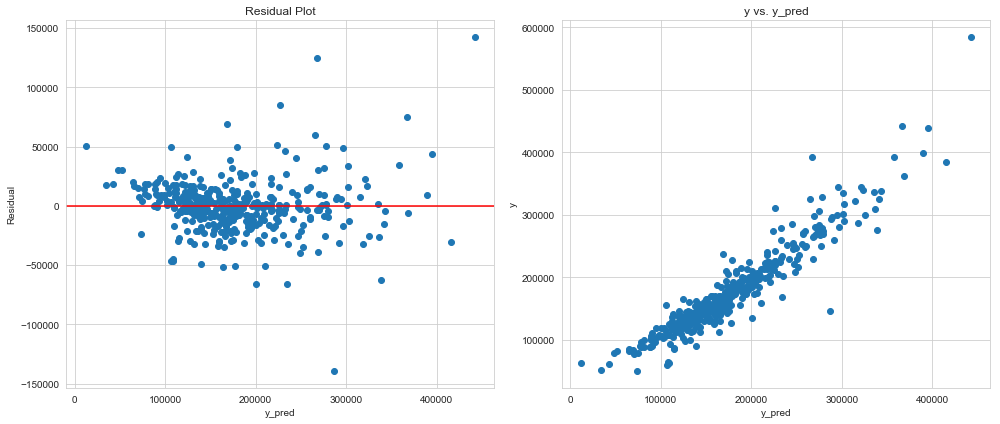

In [17]:
# Set the figure size
plt.figure(figsize=(14,6))

# Residual Plot
plt.subplot(121)
plt.scatter(y_train_te_pred, resid)
plt.axhline(0, c='red')
plt.title('Residual Plot')
plt.xlabel('y_pred')
plt.ylabel('Residual')

# y_pred vs. y
plt.subplot(122)
plt.scatter(y_train_te_pred, y_train_te)
plt.title('y vs. y_pred')
plt.xlabel('y_pred')
plt.ylabel('y')

plt.tight_layout();


In [18]:
# Features Picked by LASSO
feat_lasso = pd.DataFrame({'Feature': X_train.columns, 'beta': lasso.coef_})
feat_lasso[['Feature','beta']].sort_values(by='beta', ascending=False)

,Feature,beta
1,gr_liv_area,24908.207351
0,overall_qual,13749.606737
4,total_bsmt_sf,12798.345531
11,year_built,10656.273773
3,garage_interaction,8420.206055
...,...,...
128,bldg_type_Duplex,-4291.837894
61,bsmt_qual_TA,-9601.611532
58,bsmt_qual_Gd,-10051.451073
87,kitchen_qual_Gd,-12416.570885


In [19]:
print(feat_lasso)

                Feature          beta
0          overall_qual  13749.606737
1           gr_liv_area  24908.207351
2          overall_cond   4726.406706
3    garage_interaction   8420.206055
4         total_bsmt_sf  12798.345531
..                  ...           ...
130    bldg_type_TwnhsE  -1845.316338
131       exter_cond_Fa   -726.750759
132       exter_cond_Gd    738.350100
133       exter_cond_Po      0.000000
134       exter_cond_TA     -0.000000

[135 rows x 2 columns]


In [20]:
%store feat_lasso

Stored 'feat_lasso' (DataFrame)
